In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

## Create the data path

In [18]:
from pathlib import Path
data_loc = untar_data('https://github.com/bhavik07/fastai-learning/blob/master/dataset.tar.gz?raw=true', dest='data')
data_path = Path('data/dataset')
data_path

PosixPath('data/dataset')

In [19]:
data_path.ls()

[PosixPath('data/dataset/.DS_Store'),
 PosixPath('data/dataset/._.DS_Store'),
 PosixPath('data/dataset/test'),
 PosixPath('data/dataset/train')]

## Create ImageDataBunch

In [0]:
train_path = data_path/"train"

In [21]:
fnames = get_image_files(train_path)
fnames[:4]

[PosixPath('data/dataset/train/stop_1.jpg'),
 PosixPath('data/dataset/train/yield_0.jpg'),
 PosixPath('data/dataset/train/wrong_3.jpg'),
 PosixPath('data/dataset/train/wrong_9.jpg')]

In [0]:
# still to find the reason for this but the result did change
np.random.seed(2)

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(train_path, fnames, pat, ds_tfms=get_transforms(do_flip=False), size=244, bs=16)

In [25]:
# normalize the data, NEVER FORGET THIS
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (24 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
wrong,wrong,wrong,stop,stop
Path: data/dataset/train;

Valid: LabelList (6 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
yield,stop,yield,wrong,wrong
Path: data/dataset/train;

Test: None

## Check the data, get familiar with it, also the data classes we're going to play with
    

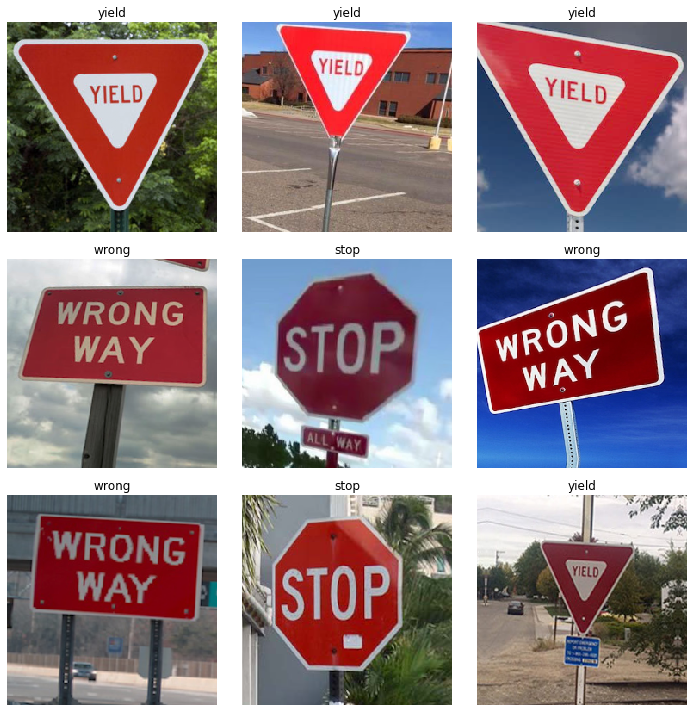

In [26]:
data.show_batch(3, figsize=(10,10))

In [27]:
data.classes

['stop', 'wrong', 'yield']

## We're ready to train, start learning

In [28]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 166MB/s]


In [29]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.714513,0.823330,0.500000,00:01
1,1.747905,1.139035,0.500000,00:00
2,1.224569,1.279990,0.500000,00:00
3,0.997298,1.171279,0.500000,00:00


In [0]:
learner.save('checkpoint-1')

## Lets see where we went wrong

In [31]:
interp = ClassificationInterpretation.from_learner(learner)

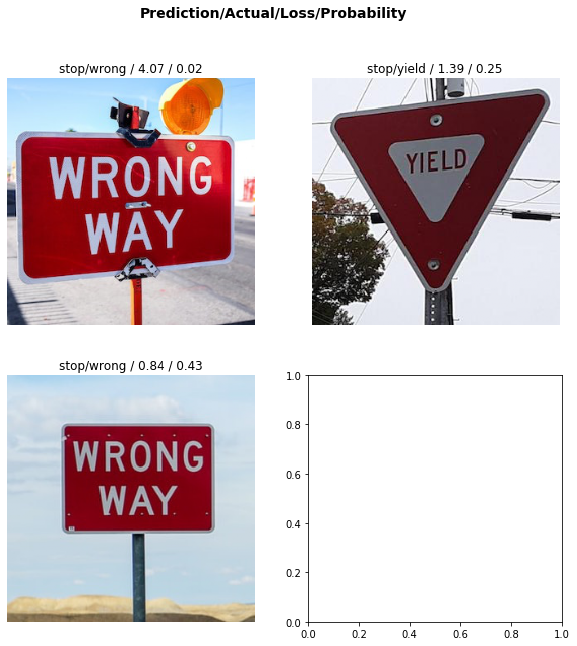

In [32]:
interp.plot_top_losses(3, figsize=(10, 10))

In [33]:
interp.most_confused()

[('wrong', 'stop', 2), ('yield', 'stop', 1)]

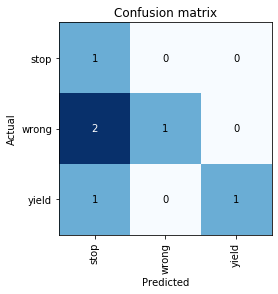

In [34]:
interp.plot_confusion_matrix()

In [35]:
len(fnames)

30

In [36]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


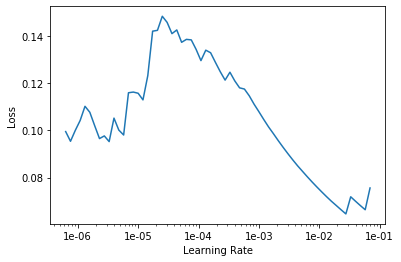

In [38]:
learner.recorder.plot()

In [39]:
learner.unfreeze()
learner.fit_one_cycle(2, max_lr=slice(1e-016, 1e-015))

epoch,train_loss,valid_loss,error_rate,time
0,0.381345,0.838762,0.333333,00:00
1,0.252446,0.707688,0.166667,00:00


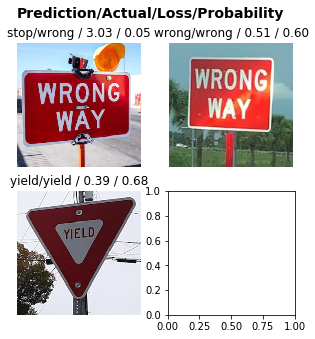

In [41]:
interp_after_unfreeze = ClassificationInterpretation.from_learner(learner)
interp_after_unfreeze.plot_top_losses(3, figsize=(5,5))

## Predict our test files

In [42]:
all_test_files = get_image_files(data_path/"test")
all_test_files

[PosixPath('data/dataset/test/stop_1.jpg'),
 PosixPath('data/dataset/test/yield_0.jpg'),
 PosixPath('data/dataset/test/wrong_0.jpg'),
 PosixPath('data/dataset/test/wrong_1.jpg'),
 PosixPath('data/dataset/test/yield_1.jpg'),
 PosixPath('data/dataset/test/stop_0.jpg')]

In [43]:
for test_file in all_test_files:
    res = learner.predict(open_image(test_file))
    print(res, test_file)

(Category stop, tensor(0), tensor([9.9952e-01, 3.7376e-04, 1.0893e-04])) data/dataset/test/stop_1.jpg
(Category yield, tensor(2), tensor([1.2281e-03, 6.0414e-04, 9.9817e-01])) data/dataset/test/yield_0.jpg
(Category wrong, tensor(1), tensor([0.0070, 0.9850, 0.0080])) data/dataset/test/wrong_0.jpg
(Category wrong, tensor(1), tensor([0.2517, 0.7201, 0.0282])) data/dataset/test/wrong_1.jpg
(Category wrong, tensor(1), tensor([0.2677, 0.3754, 0.3569])) data/dataset/test/yield_1.jpg
(Category stop, tensor(0), tensor([8.4341e-01, 1.5614e-01, 4.4341e-04])) data/dataset/test/stop_0.jpg


### DONE!!

## Trying ResNet50

In [44]:
learner50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 185MB/s]


In [45]:
learner50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.733025,1.285451,0.500000,00:01
1,1.828519,1.635133,0.500000,00:00
2,1.215916,3.337806,0.500000,00:00
3,0.903695,3.551734,0.500000,00:00


In [46]:
interp50 = ClassificationInterpretation.from_learner(learner50)

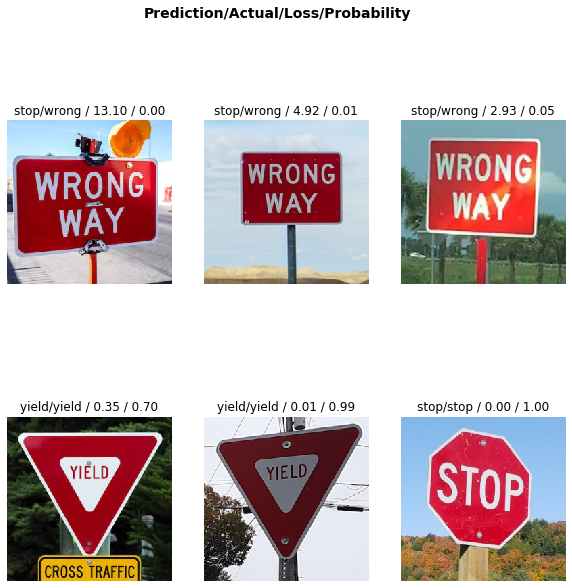

In [47]:
interp50.plot_top_losses(6, figsize=(10, 10))

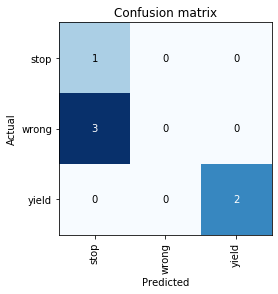

In [48]:
interp50.plot_confusion_matrix()